# Data processing
The goal of this notebook is to convert data to JSON format that can be ingested by force directed graph visualization on web

In [1]:
import pandas as pd
import json

# Ingredient-Ingredient data

Example of output JSON format:
````
{
  "nodes": [
    {"id": "alginate", "group": 1},
    {"id": "sodium", "group": 1},
    {"id": "sodium alginate", "group": 1},
    {"id": "agar", "group": 1},
    {"id": "carrageenan", "group": 1}
  ],
  "links": [
    {"source": "alginate", "target": "sodium", "value": 1},
    {"source": "sodium alginate", "target": "agar", "value": 8},
    {"source": "carrageenan", "target": "agar", "value": 10}
  ]
}
````


In [2]:
ing_ing = pd.read_csv('ingredient-ingredient.csv')

# check length of docids for the first row
# print(len(json.loads(ing_ing.loc[0].docids)))

# convert docids from string to list
ing_ing["docids"] = ing_ing.apply(lambda row: json.loads(row["docids"]), axis=1)
ing_ing["docids_count"] = ing_ing.apply(lambda row: len(row["docids"]), axis=1)
print(ing_ing.describe())
ing_ing.head()

             times  docids_count
count  2761.000000   2761.000000
mean      5.087287      6.383919
std      23.147636     33.839899
min       1.000000      1.000000
25%       1.000000      1.000000
50%       1.000000      1.000000
75%       3.000000      3.000000
max     547.000000   1033.000000


,first,second,times,docids,docids_count
0,alginate,alginate,547,"[3, 5, 6, 7, 10, 12, 13, 14, 15, 16, 17, 18, 1...",1033
1,alginate,sodium,532,"[3, 6, 10, 12, 14, 16, 19, 20, 21, 23, 24, 25,...",532
2,alginate,sodium alginate,508,"[3, 6, 10, 12, 14, 16, 19, 20, 21, 23, 24, 25,...",508
3,sodium,sodium alginate,508,"[3, 6, 10, 12, 14, 16, 19, 20, 21, 23, 24, 25,...",508
4,sodium,sodium,200,"[3, 6, 10, 11, 12, 14, 16, 19, 20, 21, 23, 24,...",564


### "times" to "docids" ratio

<AxesSubplot:xlabel='times'>

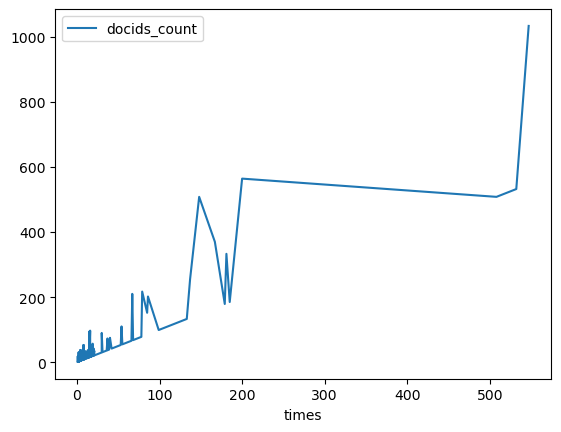

In [3]:
ing_ing.plot(x="times", y="docids_count")

### Plot distribution

<AxesSubplot:ylabel='Density'>

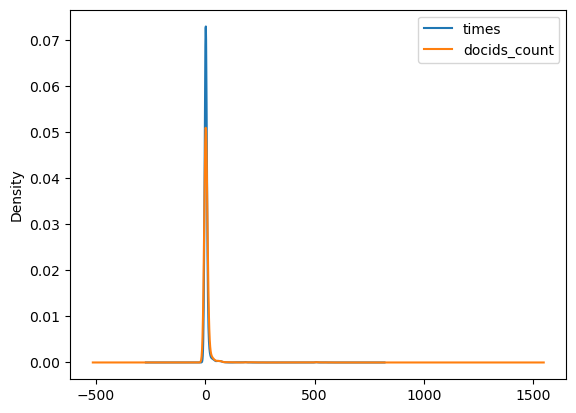

In [4]:
ing_ing.plot(kind='kde')

### Compare ingredient names

In [5]:
len(ing_ing["first"].unique())

208

In [6]:
len(ing_ing["second"].unique())

224

### Filter data

Filter rows whose "times" and "docids_count" value are below a threshold

In [7]:
def filter_low_values(ing_ing):
    times_thresh = 5
    docids_thresh = 20
    filtered_times = ing_ing[ing_ing['times'] > times_thresh]
    print("Dropped after times <",times_thresh ,"=", len(ing_ing)-len(filtered_times))
    filtered_docids = filtered_times[filtered_times['docids_count'] > docids_thresh]
    print("Dropped after docids_count <",docids_thresh,"=", len(filtered_times)-len(filtered_docids))
    print("Final rows",len(filtered_docids))
    filtered_docids.plot(kind='kde')
    return filtered_docids

Dropped after times < 5 = 2363
Dropped after docids_count < 20 = 282
Final rows 116


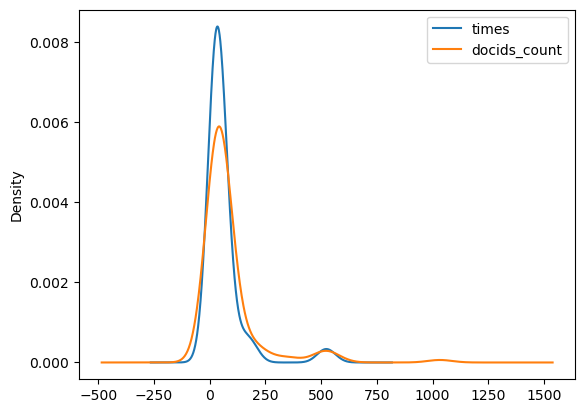

In [8]:
filtered_ing_ing = filter_low_values(ing_ing)

Filter rows whose ingredient names are equal. Since we can't visualize rows like: "alginate" - "alginate"

In [9]:
def filter_repeated_links(ing_ing):
    somelist = []
    for index, row in ing_ing.iterrows():
        if row["first"] != row["second"]:
            somelist.append(row)
    return pd.DataFrame(somelist)

In [10]:
filtered_no_repeat_ing_ing = filter_repeated_links(filtered_ing_ing)
print("Dropped",len(filtered_ing_ing)- len(filtered_no_repeat_ing_ing), "rows")
print("Final rows:",len(filtered_no_repeat_ing_ing) )
filtered_no_repeat_ing_ing.head()

Dropped 36 rows
Final rows: 80


,first,second,times,docids,docids_count
1,alginate,sodium,532,"[3, 6, 10, 12, 14, 16, 19, 20, 21, 23, 24, 25,...",532
2,alginate,sodium alginate,508,"[3, 6, 10, 12, 14, 16, 19, 20, 21, 23, 24, 25,...",508
3,sodium,sodium alginate,508,"[3, 6, 10, 12, 14, 16, 19, 20, 21, 23, 24, 25,...",508
5,alginate,calcium,185,"[5, 7, 13, 29, 33, 62, 79, 97, 98, 116, 118, 1...",185
7,alginate,chitosan,179,"[5, 10, 17, 23, 30, 35, 52, 101, 127, 138, 146...",179


### Data export
Export data for d3 force graph visualization

In [27]:
def create_nodes_list(df):
    # list of all unique nodes in both columns
    ing_list =[]
    unique_union = list(set(df["first"].unique()).union(set(df["second"].unique())))
    for ingredient in unique_union:
        ing_dict = {}
        ing_dict["id"] = ingredient
        ing_list.append(ing_dict)
    return json.dumps(ing_list)

In [28]:
nodes_list = create_nodes_list(filtered_no_repeat_ing_ing)
nodes_list

'[{"id": "poly vinyl alcohol"}, {"id": "alginate"}, {"id": "sodium alginate"}, {"id": "silver"}, {"id": "propylene"}, {"id": "carrageenan"}, {"id": "methyl"}, {"id": "cellulose"}, {"id": "graphene oxide"}, {"id": "xanthan gum"}, {"id": "chloride"}, {"id": "alcohol"}, {"id": "collagen"}, {"id": "soy protein"}, {"id": "calcium chloride"}, {"id": "gelatin"}, {"id": "glycerol"}, {"id": "chitosan"}, {"id": "calcium"}, {"id": "zinc"}, {"id": "starch"}, {"id": "gum"}, {"id": "polyethylene glycol"}, {"id": "xanthan"}, {"id": "carbon"}, {"id": "pectin"}, {"id": "soy"}, {"id": "sodium"}, {"id": "graphene"}, {"id": "agar"}, {"id": "whey protein"}, {"id": "\\u03ba carrageenan"}]'

### Load Ingredient-Property data

In [7]:
ing_prop = pd.read_excel('ingredient-property.xlsx') 
ing_prop.head()

,ingredient,property,times,docids
0,alginate,tensile strength,320,"[6, 13, 14, 16, 19, 20, 21, 28, 29, 30, 38, 42..."
1,alginate,water vapor,201,"[3, 6, 7, 13, 16, 17, 18, 19, 22, 42, 62, 67, ..."
2,sodium,tensile strength,196,"[6, 11, 14, 16, 19, 20, 21, 29, 38, 42, 67, 68..."
3,sodium alginate,tensile strength,182,"[6, 14, 16, 19, 20, 21, 29, 38, 42, 67, 68, 69..."
4,alginate,thickness,149,"[14, 23, 33, 85, 92, 100, 134, 140, 189, 195, ..."


### Load Abstracts Database

In [10]:
abstracts_database = pd.read_excel('article-abstract-doi-database.xlsx') 
abstracts_database.head()

,ID,Authors,Title,Year,DOI,Link,Abstract,DOWNLOAD
0,0,Marvizadeh M.M.; Tajik A.; Moosavian V.; Oladz...,Fabrication of cassava starch/mentha piperita ...,2021.0,10.22034/jchr.2020.1900584.1135,https://www.scopus.com/inward/record.uri?eid=2...,In this study; an edible film is prepared usin...,1.0
1,1,Yu G.; Zhang Q.; Wang Y.; Yang Q.; Yu H.; Li H...,Sulfated polysaccharides from red seaweed Geli...,2021.0,10.1016/j.foodhyd.2021.106820,https://www.scopus.com/inward/record.uri?eid=2...,Marine red algae are rich sources of sulfated ...,1.0
2,2,Wang B.; Yan S.; Gao W.; Kang X.; Yu B.; Liu P...,Antibacterial activity; optical; and functiona...,2021.0,10.1016/j.foodchem.2021.129743,https://www.scopus.com/inward/record.uri?eid=2...,In this study; the optical; morphological; ant...,1.0
3,3,Zhang J.; Huang X.; Shi J.; Liu L.; Zhang X.; ...,A visual bi-layer indicator based on roselle a...,2021.0,10.1016/j.foodchem.2021.129573,https://www.scopus.com/inward/record.uri?eid=2...,This study designed a new type indicator with ...,1.0
4,4,Roy S.; Rhim J.-W.,Fabrication of pectin/agar blended functional ...,2021.0,10.1016/j.foodhyd.2021.106823,https://www.scopus.com/inward/record.uri?eid=2...,Pectin/agar blended multifunctional composite ...,1.0
